In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import Config as cfg
from DataSet import *
from AnomalyDetector import *

In [ ]:
# Switching back to the original Colab directory
%cd /content/

/content


---

## **1. Download Ushant dataset**

In [ ]:
data_obj = DatasetProcessor(cfg.URL, cfg.FILENAME, cfg.FOLDER_PATH, cfg.DATA_FOLDER)

In [ ]:
data = data_obj.create_dataframe()

data

Reading all files ...


100%|██████████| 18603/18603 [00:44<00:00, 415.81it/s]


,x,y,vx,vy,t
0,-4.293253,49.442193,-15.186699,-8.074911,0
1,-4.373430,49.413937,-15.363288,-8.168805,757
2,-4.388880,49.408430,-15.274993,-8.121858,910
3,-4.407648,49.401755,-15.186699,-8.074911,1069
4,-4.422477,49.396573,-15.274993,-8.121858,1200
...,...,...,...,...,...
7131988,-4.068565,49.358905,11.741388,7.624946,41968
7131989,-4.052942,49.364577,11.741388,7.624946,42149
7131990,-4.052423,49.364765,11.741388,7.624946,42157
7131991,-4.050432,49.365498,11.825255,7.679411,42180


In [ ]:
X_train_location, X_test_location = data_obj.create_location_dataset(data)

X_train_location.shape, X_test_location.shape

((5705594, 2), (1426399, 2))

In [ ]:
X_train_velocity, X_test_velocity = data_obj.create_velocity_dataset(data)

X_train_velocity.shape, X_test_velocity.shape

((5705594, 2), (1426399, 2))

---

##**2. Use a classic method to learn normal behavior from the Ushant AIS data**

**2.1. Classic Location Model**

In [ ]:
classic_location_detector = AnomalyDetectorFactory.anomaly_detector('classic', 'location')

In [ ]:
classic_location_detector.build_model()
classic_location_detector.train_model(X_train_location)

Training model...
GMM threshold: 77.6363481968473


**2.2. Classic Velocity Model**

In [ ]:
classic_velocity_detector = AnomalyDetectorFactory.anomaly_detector('classic', 'velocity')

In [ ]:
classic_velocity_detector.build_model()
classic_velocity_detector.train_model(X_train_velocity)

Training model...
GMM threshold: 1.8091808515605594


---

## **3. Use a machine learning/deep learning-based method to learn normal behavior from the Ushant AIS data**

**3.1. DL Location Model**

In [ ]:
dl_location_detector = AnomalyDetectorFactory.anomaly_detector('deep_learning', 'location')
dl_location_detector.build_model(X_train_location.shape[1])

In [ ]:
history_location = dl_location_detector.train_model(X_train_location, X_test_location, epochs=20)

Training model...
Epoch 1/20
11144/11144 [==============================] - 57s 5ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 2/20
11144/11144 [==============================] - 50s 4ms/step - loss: 0.0011 - val_loss: 6.5514e-04
Epoch 3/20
11144/11144 [==============================] - 48s 4ms/step - loss: 8.7784e-04 - val_loss: 9.8430e-04
Epoch 4/20
11144/11144 [==============================] - 50s 5ms/step - loss: 7.9621e-04 - val_loss: 7.4958e-04
Epoch 5/20
11144/11144 [==============================] - 48s 4ms/step - loss: 7.9584e-04 - val_loss: 0.0018
Epoch 6/20
11144/11144 [==============================] - 51s 5ms/step - loss: 7.9104e-04 - val_loss: 4.0904e-04
Epoch 7/20
11144/11144 [==============================] - 54s 5ms/step - loss: 6.9083e-04 - val_loss: 5.8720e-04
Epoch 8/20
11144/11144 [==============================] - 46s 4ms/step - loss: 7.4918e-04 - val_loss: 4.4498e-04
Epoch 9/20
11144/11144 [==============================] - 49s 4ms/step - loss: 6.7349e-04 - va

**3.2. DL Velocity Model**

In [ ]:
dl_velocity_detector = AnomalyDetectorFactory.anomaly_detector('deep_learning', 'velocity')
dl_velocity_detector.build_model(X_train_velocity.shape[1])

In [ ]:
history_velocity = dl_velocity_detector.train_model(X_train_velocity, X_test_velocity, epochs=20)

Training model...
Epoch 1/20
11144/11144 [==============================] - 51s 4ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 2/20
11144/11144 [==============================] - 54s 5ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/20
11144/11144 [==============================] - 47s 4ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/20
11144/11144 [==============================] - 46s 4ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/20
11144/11144 [==============================] - 49s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 6/20
11144/11144 [==============================] - 49s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/20
11144/11144 [==============================] - 51s 5ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/20
11144/11144 [==============================] - 51s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/20
11144/11144 [==============================] - 48s 4ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 10/20
11144/11144 [============

---

**plot train history**

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, tilte):
    # Plot the history of the model
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(tilte)
    plt.legend()
    plt.show()

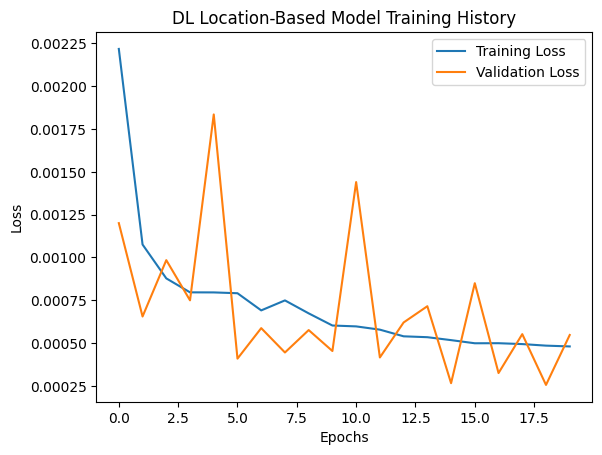

In [ ]:
plot_history(history_location,'DL Location-Based Model Training History')

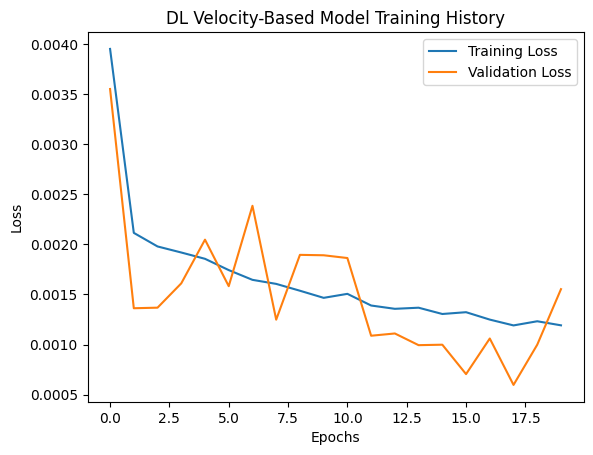

In [ ]:
plot_history(history_velocity,'DL Velocity-Based Model Training History')

---

## **4. Generate synthetic abnormal trajectories with two types of abnormal behavior: location-based anomaly and velocity-based anomaly (At least 15 synthetic trajectories)**

In [ ]:
def gen_synthetic_abnormal_trajectories(df):
    xy_max = data[['x','y']].max().max()
    v_max = data[['vx','vy']].max().max()

    # Generate a random 2D array between 100 and 200
    abnormal_xy = np.random.uniform(xy_max, 2*xy_max, size=(15, 2))
    abnormal_v  = np.random.uniform(v_max, 2*v_max, size=(15, 2))

    print(f"-abnormal_xy: \n {abnormal_xy}\n")
    print(f"-abnormal_v:  \n {abnormal_v}")

    return abnormal_xy, abnormal_v

In [ ]:
abnormal_xy, abnormal_v = gen_synthetic_abnormal_trajectories(data)

-abnormal_xy: 
 [[375.19381009 291.63752724]
 [417.85614461 253.4222644 ]
 [320.96484744 230.02838404]
 [335.74354111 236.97167005]
 [352.25388659 342.02291165]
 [260.07193758 357.28607346]
 [344.48900209 402.61628608]
 [422.73513578 383.80750479]
 [274.11142696 412.34302779]
 [375.49333514 286.98203007]
 [423.51565807 268.66793182]
 [219.90619646 214.90343388]
 [302.77770006 358.7942633 ]
 [417.95080225 307.84894351]
 [272.38483115 393.48842542]]

-abnormal_v:  
 [[40.16477221 36.35834655]
 [46.88085491 50.08908167]
 [48.7564107  46.28812017]
 [44.25361192 49.38981491]
 [55.81460781 53.97990022]
 [51.25878636 42.20324539]
 [30.03962666 44.36341394]
 [42.6581963  38.87091513]
 [35.58444408 33.77362758]
 [34.1529569  48.07217856]
 [54.53927961 30.04086895]
 [43.22618697 47.09061758]
 [39.92922349 37.14038101]
 [28.59674709 51.03553547]
 [41.888117   36.14792161]]


---

## **5. Test the trained models on synthetic data and report results**

**5.1. classic location-based anomaly**

In [ ]:
classic_location_detector.detect_anomalies(abnormal_xy)

Scaler loaded successfully.
[0.76267386 0.38864592] Data point at index 0 is Abnormal !!!
[0.97220407 0.19509172] Data point at index 1 is Abnormal !!!
[0.49633573 0.07660546] Data point at index 2 is Abnormal !!!
[0.56891926 0.11177209] Data point at index 3 is Abnormal !!!
[0.65000756 0.64383985] Data point at index 4 is Abnormal !!!
[0.19726854 0.72114532] Data point at index 5 is Abnormal !!!
[0.6118714  0.95073561] Data point at index 6 is Abnormal !!!
[0.99616657 0.85547213] Data point at index 7 is Abnormal !!!
[0.26622157 1.        ] Data point at index 8 is Abnormal !!!
[0.76414493 0.36506657] Data point at index 9 is Abnormal !!!
[1.         0.27230859] Data point at index 10 is Abnormal !!!
[0. 0.] Data point at index 11 is Abnormal !!!
[0.40701205 0.72878406] Data point at index 12 is Abnormal !!!
[0.97266897 0.47075416] Data point at index 13 is Abnormal !!!
[0.25774163 0.90450445] Data point at index 14 is Abnormal !!!


**5.2. classic velocity-based anomaly**

In [ ]:
classic_velocity_detector.detect_anomalies(abnormal_v)

Scaler loaded successfully.
[0.42501596 0.26389863] Data point at index 0 is Abnormal !!!
[0.67176873 0.83746967] Data point at index 1 is Abnormal !!!
[0.74067774 0.67869293] Data point at index 2 is Abnormal !!!
[0.5752423  0.80825935] Data point at index 3 is Abnormal !!!
[1. 1.] Data point at index 4 is Abnormal !!!
[0.83261648 0.50805633] Data point at index 5 is Abnormal !!!
[0.05301223 0.59829259] Data point at index 6 is Abnormal !!!
[0.51662581 0.36885562] Data point at index 7 is Abnormal !!!
[0.25673204 0.15592772] Data point at index 8 is Abnormal !!!
[0.20413837 0.75321801] Data point at index 9 is Abnormal !!!
[0.9531437 0.       ] Data point at index 10 is Abnormal !!!
[0.53749411 0.71221548] Data point at index 11 is Abnormal !!!
[0.41636176 0.29656639] Data point at index 12 is Abnormal !!!
[0.         0.87700569] Data point at index 13 is Abnormal !!!
[0.48833264 0.2551086 ] Data point at index 14 is Abnormal !!!


**5.3. DL location-based anomaly**

In [ ]:
dl_location_detector.detect_anomalies(abnormal_xy)

Scaler loaded successfully.
1/1 [==============================] - 0s 75ms/step
Data point at index 0 is Abnormal
Data point at index 1 is Abnormal
Data point at index 2 is Abnormal
Data point at index 3 is Abnormal
Data point at index 4 is Abnormal
Data point at index 5 is Normal
Data point at index 6 is Abnormal
Data point at index 7 is Abnormal
Data point at index 8 is Abnormal
Data point at index 9 is Abnormal
Data point at index 10 is Abnormal
Data point at index 11 is Abnormal
Data point at index 12 is Normal
Data point at index 13 is Abnormal
Data point at index 14 is Abnormal


**5.4. classic velocity-based anomaly**

In [ ]:
dl_velocity_detector.detect_anomalies(abnormal_v)

Scaler loaded successfully.
1/1 [==============================] - 0s 73ms/step
Data point at index 0 is Normal
Data point at index 1 is Normal
Data point at index 2 is Normal
Data point at index 3 is Normal
Data point at index 4 is Abnormal
Data point at index 5 is Normal
Data point at index 6 is Normal
Data point at index 7 is Normal
Data point at index 8 is Normal
Data point at index 9 is Normal
Data point at index 10 is Abnormal
Data point at index 11 is Normal
Data point at index 12 is Normal
Data point at index 13 is Abnormal
Data point at index 14 is Normal
